# Vasicek model step by step

## Distance to default

In [3]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

Parameters of one company:
- Value of the current assets = 1,000,000
- Standard deviation = 200,000
- Value of the debt = 700,000

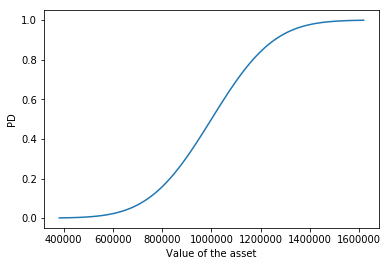

In [2]:
mu = 1000000
sigma = 200000
x = np.linspace(mu - 3.09*sigma, mu + 3.09*sigma, 100)
plt.plot(x, norm.cdf(x, mu, sigma))
plt.xlabel("Value of the asset")
plt.ylabel("PD")
plt.show()

In [3]:
# What is the probabilty at which the value of the assets is equal to debt
pd = norm.cdf(700000, mu, sigma)

# Use PPF - Percent point function (inverse of cdf — percentiles) to conver PD to distance to default
distance_to_default = norm.ppf(pd)

In [4]:
print(pd,"is equivalent to",distance_to_default, "distance to default in std") 
# this is equivalent to a -1.5 std from the mean

0.06680720126885807 is equivalent to -1.5000000000000004 distance to default in std


In [5]:
distance_from_economy = norm.ppf(0.999) # distance for worst economic level
distance_from_economy

3.090232306167813

## Distance to default downturn
DistanceToDefaultDownturn = (1-r)^-0.5 X DistanceToDefault + (r/(1-r))^0.5 X DistanceFromEconomy

In [6]:
rho = 0.12
distance_to_default_downturn = (np.sqrt(1/1-rho)*distance_to_default) + (np.sqrt(rho/1-rho)*distance_from_economy)
distance_to_default_downturn

-1.4071247279470294

In [7]:
pd_downturn = norm.cdf(distance_to_default_downturn)
pd_downturn

0.07969520338701691

In [8]:
impact = pd_downturn - pd
impact

0.01288800211815884

# Asset correlation

In [9]:
from utils.utils import get_rho_asset_correlation
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [10]:
PD_list = np.arange(0.0, 0.11, 0.001)

In [11]:
rho_list = []
for p in PD_list:
    rho_list.append(get_rho_asset_correlation(p))

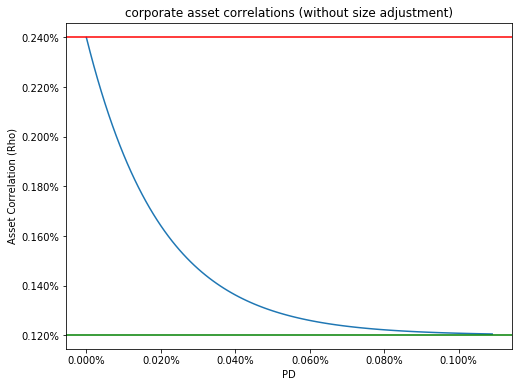

In [12]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1,1,1)
ax.plot(PD_list, rho_list)

# X axis
ax.set_xlabel("PD")
ax.xaxis.set_major_formatter(ticker.PercentFormatter())

# Y axis
ax.set_ylabel("Asset Correlation (Rho)")
ax.yaxis.set_major_formatter(ticker.PercentFormatter())

# Title
ax.set_title("corporate asset correlations (without size adjustment)")

# Lines
ax.axhline(0.24, color='r')
ax.axhline(0.12, color='g')

# Step by Step capital Requirements

In [82]:
from scipy.stats import norm

EAD = 100
PD = 0.0003
LGD = 0.45
M = 2.5

In [83]:
# asset correlation
weighting = (1 - np.exp(-50 * PD)) / (1 - np.exp(-50))
rho = 0.12 * weighting + 0.24 * (1 - weighting)
rho

0.2382134327523675

In [84]:
b  = (0.11852 - 0.05478 * np.log(PD))**2
maturity_adj = (1 + (M - 2.5) * b) / (1 - 1.5 * b)

# worst case default rate via Gaussian copula
wcdr = norm.cdf(np.sqrt(1/(1-rho)) * norm.ppf(PD) + np.sqrt(rho/(1-rho)) * norm.ppf(0.999))

K = (LGD * (wcdr - PD)) * maturity_adj

In [88]:
np.sqrt(1/(1-rho)) * norm.ppf(PD)

-3.931713166244386

In [85]:
maturity_adj

1.9056752706384454

In [86]:
K

0.011554853832932789

In [87]:
RWperc = K * 12.5
RWperc

0.14443567291165987

https://www.bis.org/basel_framework/chapter/CRE/99.htm?inforce=20191215